<a href="https://colab.research.google.com/github/mmorra13/Intro-To-ML/blob/main/Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
import seaborn as sns
from scipy import stats
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
#PROBLEM 1
# Load the diabetes dataset
file_path1 = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path1))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [48]:
varlist1 = ['diagnosis']
#Defining map function
def binary_map(x):
  return x.map({'B': 1, 'M': 0})

#Applying the function to the cancer dataset
#Malignant becomes 0, Benign becomes 1
cancer[varlist1] = cancer[varlist1].apply(binary_map)
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
#Split the dataset into inputs/output
X1 = cancer.iloc[:, 2:32]
Y1 = cancer.iloc[:, 1]

In [50]:
#Input standardization
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [51]:
svc_lin = SVC(kernel='linear',C=100) #Define instance of SVC model to be fit to data for K # of principal components later, explore different values of C
svc_rbf = SVC(kernel='rbf',C=100)
svc_poly = SVC(kernel='poly',C=100)

In [52]:
#Linear
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9] #Test up to 9 principal components, increase if needed for greater accuracy
accuracy1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define accuracy array for graphing over iteration
precision1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define precision array for graphing over iteration
recall1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define recall array for graphing over iteration
for k in K1:
  pca1 = PCA(n_components = k) #Create PCA instance with k components
  principalComponents1 = pca1.fit_transform(X1) #Fit the data
  X1_train, X1_test, Y1_train, Y1_test = train_test_split(principalComponents1, Y1, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  svc_lin.fit(X1_train,Y1_train) #Fit the pca components and outputs of training set to SVC model
  Y1_pred = svc_lin.predict(X1_test) #Predictions for test set
  #Accuracy, precision, recall, and F1 score for graph
  accuracy1[k-1] = metrics.accuracy_score(Y1_test, Y1_pred)
  precision1[k-1] = metrics.precision_score(Y1_test, Y1_pred)
  recall1[k-1] = metrics.recall_score(Y1_test, Y1_pred)

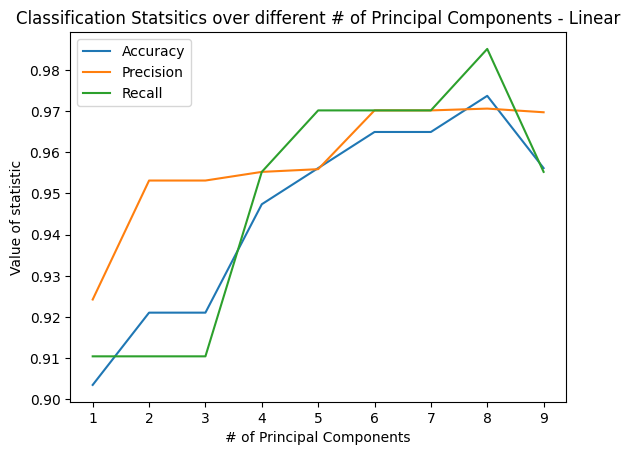

In [53]:
#Plot accuracy, precision, and recall over different number of principal components K
plt.plot(K1,accuracy1,K1,precision1,K1,recall1)
plt.title('Classification Statsitics over different # of Principal Components - Linear')
plt.xlabel('# of Principal Components')
plt.ylabel('Value of statistic')
plt.legend(['Accuracy','Precision','Recall'])

In [54]:
#RBF
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9] #Test up to 9 principal components, increase if needed for greater accuracy
accuracy1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define accuracy array for graphing over iteration
precision1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define precision array for graphing over iteration
recall1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define recall array for graphing over iteration
for k in K1:
  pca1 = PCA(n_components = k) #Create PCA instance with k components
  principalComponents1 = pca1.fit_transform(X1) #Fit the data
  X1_train, X1_test, Y1_train, Y1_test = train_test_split(principalComponents1, Y1, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  svc_rbf.fit(X1_train,Y1_train) #Fit the pca components and outputs of training set to SVC model
  Y1_pred = svc_rbf.predict(X1_test) #Predictions for test set
  #Accuracy, precision, recall, and F1 score for graph
  accuracy1[k-1] = metrics.accuracy_score(Y1_test, Y1_pred)
  precision1[k-1] = metrics.precision_score(Y1_test, Y1_pred)
  recall1[k-1] = metrics.recall_score(Y1_test, Y1_pred)

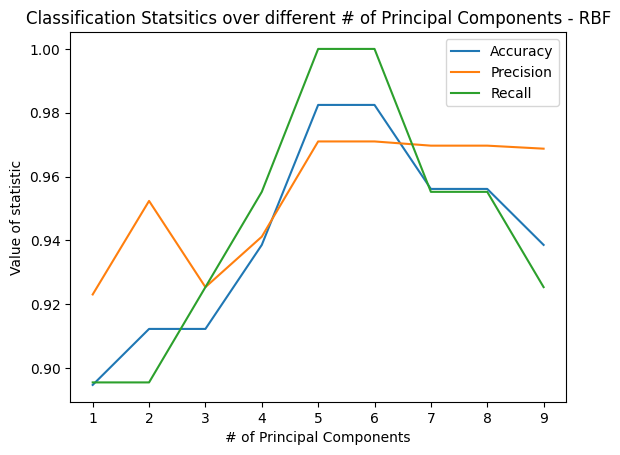

In [55]:
#Plot accuracy, precision, and recall over different number of principal components K
plt.plot(K1,accuracy1,K1,precision1,K1,recall1)
plt.title('Classification Statsitics over different # of Principal Components - RBF')
plt.xlabel('# of Principal Components')
plt.ylabel('Value of statistic')
plt.legend(['Accuracy','Precision','Recall'])

In [56]:
#Poly
K1 = [1, 2, 3, 4, 5, 6, 7, 8, 9] #Test up to 9 principal components, increase if needed for greater accuracy
accuracy1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define accuracy array for graphing over iteration
precision1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define precision array for graphing over iteration
recall1 = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define recall array for graphing over iteration
for k in K1:
  pca1 = PCA(n_components = k) #Create PCA instance with k components
  principalComponents1 = pca1.fit_transform(X1) #Fit the data
  X1_train, X1_test, Y1_train, Y1_test = train_test_split(principalComponents1, Y1, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  svc_poly.fit(X1_train,Y1_train) #Fit the pca components and outputs of training set to SVC model
  Y1_pred = svc_poly.predict(X1_test) #Predictions for test set
  #Accuracy, precision, recall, and F1 score for graph
  accuracy1[k-1] = metrics.accuracy_score(Y1_test, Y1_pred)
  precision1[k-1] = metrics.precision_score(Y1_test, Y1_pred)
  recall1[k-1] = metrics.recall_score(Y1_test, Y1_pred)

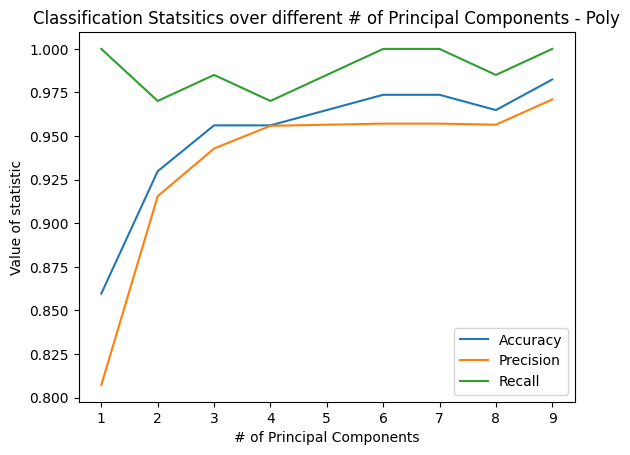

In [57]:
#Plot accuracy, precision, and recall over different number of principal components K
plt.plot(K1,accuracy1,K1,precision1,K1,recall1)
plt.title('Classification Statsitics over different # of Principal Components - Poly')
plt.xlabel('# of Principal Components')
plt.ylabel('Value of statistic')
plt.legend(['Accuracy','Precision','Recall'])

In [104]:
#PROBLEM 2
file_path2 = '/content/drive/My Drive/Courses/Intro-to-ML/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path2))
housing.head() #Show first 5 of .csv data to confirm import success

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [105]:
varlist2 = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

#Defining map function
def binary_map(x):
  return x.map({'yes': 1, 'no': 0})

#Applying the function to the housing list
housing[varlist2] = housing[varlist2].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [106]:
#Extracting desired inputs
X2 = housing.iloc[:, 1:12]
#Extracting desired output
Y2 = housing.iloc[:, 0]
#Standardizing non-binary input values
num_vars2 = ['area','bedrooms','bathrooms','stories','parking']
X2[num_vars2] = sc.fit_transform(X2[num_vars2])

In [107]:
svr_lin = SVR(kernel='linear',C=10000) #Instance of linear kernel SVR, explore different values of C
svr_rbf = SVR(kernel='rbf',C=10000,gamma=0.1) #Instance of rbf kernel SVR, explore different values of C and gamma
svr_poly = SVR(kernel='poly',C=10000,degree=2) #Instance of poly kernel SVR, explore different values of C and degree

In [108]:
#Linear
K2 = [1, 2, 3, 4, 5, 6, 7, 8, 9] #Test up to 9 principal components, increase if needed for greater accuracy
linearError = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define accuracy array for graphing over iteration
rbfError = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define precision array for graphing over iteration
polyError = [0, 0, 0, 0, 0, 0, 0, 0, 0] #Define recall array for graphing over iteration
for k in K2:
  pca2 = PCA(n_components = k) #Create PCA instance with k components
  principalComponents2 = pca2.fit_transform(X2) #Fit the data
  X2_train, X2_test, Y2_train, Y2_test = train_test_split(principalComponents2, Y2, test_size = 0.2, random_state = 0) #Split the dataset into training and test, 80-20 split
  Y2_rbf = svr_rbf.fit(X2_train, Y2_train).predict(X2_test)
  Y2_lin = svr_lin.fit(X2_train, Y2_train).predict(X2_test)
  Y2_poly = svr_poly.fit(X2_train, Y2_train).predict(X2_test)
  linearError[k-1] = mean_squared_error(Y2_lin,Y2_test)
  rbfError[k-1] = mean_squared_error(Y2_rbf,Y2_test)
  polyError[k-1] = mean_squared_error(Y2_poly,Y2_test)

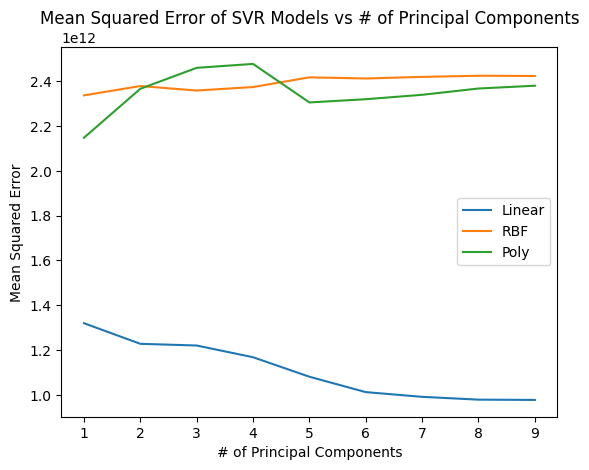

In [109]:
#Plot accuracy, precision, and recall over different number of principal components K
plt.plot(K2,linearError,K2,rbfError,K2,polyError)
plt.title('Mean Squared Error of SVR Models vs # of Principal Components')
plt.xlabel('# of Principal Components')
plt.ylabel('Mean Squared Error')
plt.legend(['Linear','RBF','Poly'])